<a href="https://colab.research.google.com/github/Satwikram/Deep-Learning-Implementations/blob/master/MTCNN/MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K

Face Detection Using MTCNN Algorithm and Tensorflow

First Lets Try using Open CV  CascadeClassifier class

In [2]:
# check opencv version
import cv2
# print version number
print(cv2.__version__)

4.1.2


To download Cascade xml file : https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

### Load the pre-trained model

In [8]:
classifier = cv2.CascadeClassifier('cascade.xml')

###  Perform face detection

In [9]:
import matplotlib.pyplot as plt
image = plt.imread('/content/test.jpg')

In [10]:
bboxes = classifier.detectMultiScale(image)
# print bounding box for each detected face
for box in bboxes:
	print(box)

[452 138 330 330]


### Draw a rectangle over the pixels

In [11]:
# extract
x, y, width, height = box
x2, y2 = x + width, y + height
cv2.rectangle(image, (x, y), (x2, y2), (0,0,255), 1)

array([[[63, 63, 63],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       [[63, 63, 63],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       [[64, 64, 64],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       ...,

       [[40, 40, 40],
        [40, 40, 40],
        [40, 40, 40],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[40, 40, 40],
        [40, 40, 40],
        [40, 40, 40],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[40, 40, 40],
        [40, 40, 40],
        [40, 40, 40],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]]], dtype=uint8)

In [12]:
drawn = cv2.rectangle(image, (x, y), (x2, y2), (0,0,255), 1)

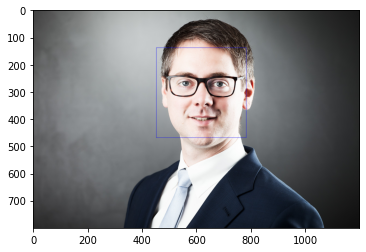

In [13]:
plt.imshow(drawn)

In [26]:
import numpy as np
fname = '/content/test2.png'
img = cv2.imread(fname)
img = np.array(img, dtype='uint8')

For Multiple Faces with more Accuracy!

In [40]:
# perform face detection
bboxes = classifier.detectMultiScale(img, 1.05, 8)

In [41]:
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	cv2.rectangle(img, (x, y), (x2, y2), (0,0,255), 1)

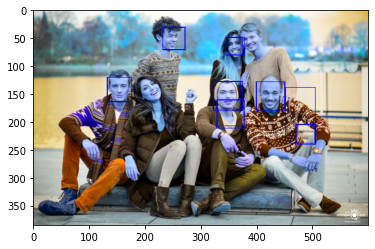

In [42]:
plt.imshow(img)

Its not perfect!

### Face Detection Using MTCNN

The MTCNN is popular because it achieved then state-of-the-art results on a range of benchmark datasets, and because it is capable of also recognizing other facial features such as eyes and mouth, called landmark detection.

The network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid), then the first model (Proposal Network or P-Net) proposes candidate facial regions, the second model (Refine Network or R-Net) filters the bounding boxes, and the third model (Output Network or O-Net) proposes facial landmarks.

### Lets Install MTCNN 

In [44]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 3.3MB/s 


In [45]:
!pip show mtcnn

Name: mtcnn
Version: 0.1.0
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras, opencv-python
Required-by: 


In [47]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


### Importing MTCNN

In [75]:
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

In [90]:
#Lets detect multiple face using mtcnn
filename = '/content/test3.jpg'

In [91]:
test = plt.imread(filename)

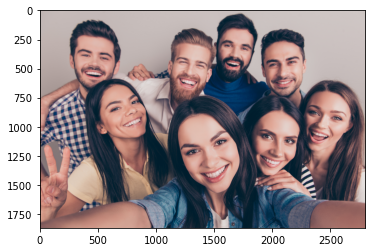

In [92]:
plt.imshow(test)

###  Draw an image with detected objects

In [93]:
def draw_image_with_boxes(filename, result_list):
  # load the image
	data = plt.imread(filename)
	# plot the image
	plt.imshow(data)
	# get the context for drawing boxes
	ax = plt.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	plt.show()


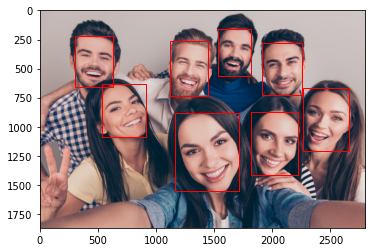

In [94]:
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(test)
# display faces on the original image
draw_image_with_boxes(filename, faces)

### Extracting the pixel data directly out of the photograph

We can Directly extract faces and send it to model for prediction

In [95]:
# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = plt.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		plt.subplot(1, len(result_list), i+1)
		plt.axis('off')
		# plot face
		plt.imshow(data[y1:y2, x1:x2])
	# show the plot
	plt.show()

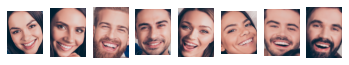

In [96]:
draw_faces(filename, faces)